<a href="https://www.kaggle.com/code/mahbuburrahman2020/se-europe-data-challenge-data-analysis?scriptVersionId=160611378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Powering Tomorrow: A Global Odyssey of Sustainable Innovation - Top Countries Illuminating 2022 with Green Energy Brilliance**

Sustainable power generation is trending now-a-days. Governments of different countries in the world now investing in the sustainable power generation to save planet from climate change and other socio-economic issues. This data story tells about the green energy production in European counties in year 2022. The main character of this story is the green energy. I tell some insights about the green energy brilliance in Europe in year 2022.

In [1]:
import pandas as pd
import numpy as np
import os

I use dataset from Kaggle which is created and fine-tuned by me from the raw data of Entsoe Transparency Platform. The dataset contains monthly energy generation quantity of year 2022 from different type of green energy production sources in different countries in Europe.

In [2]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/gen_2022_monthly.csv"

In Europe, the countries generate green energy mainly from Wind, Water, Solar. There are also other form of green energy generations. These main sources of green energy generations are splitted into some specific energy generations to get better understanding about the energy productions.

In [3]:
df_gen_2022_monthly = pd.read_csv(file_name)
df_gen_2022_monthly

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13777505,MAW
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12540609,MAW
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13949928,MAW
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13169383,MAW
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13334915,MAW
...,...,...,...,...,...,...,...,...,...,...
739,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,479952,MAW
740,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,27040,MAW
741,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,177457,MAW
742,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,577406,MAW


I create a data profiling report to get an overview of the dataset. I use ydata profiling python package to generate the report.

In [ ]:
file_name = "gen_2022_data_profile.html"

In [ ]:
from ydata_profiling import ProfileReport
df_gen_data_profile_path = os.path.join('/kaggle/working/', file_name)
profile = ProfileReport(df_gen_2022_monthly, title="Energy Generation : Year 2022")
profile.to_file(df_gen_data_profile_path)

I see that there are some missing data in the AreaID variable. The AreaID contains the area code of the generation of a country. From the dataset, I remove the rows which contain missing AreaID. 

In [4]:
df_gen_2022_monthly = df_gen_2022_monthly.dropna()
df_gen_2022_monthly = df_gen_2022_monthly.set_index(pd.Index(np.arange(0, df_gen_2022_monthly.shape[0])))
df_gen_2022_monthly

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13777505,MAW
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12540609,MAW
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13949928,MAW
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13169383,MAW
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13334915,MAW
...,...,...,...,...,...,...,...,...,...,...
605,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1,481819,MAW
606,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1,27196,MAW
607,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1,177543,MAW
608,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1,578316,MAW


I grouped the data according to country, generation type, production type. I aggregate the quantity using "sum" function and get the total energy generation quantity in MAW. MAW is the unit name of the energy generation.

In [5]:
df_gen_2022_country_gen_types = df_gen_2022_monthly.groupby(by=["Country", "GenType", "PsrTypeName"])[["quantity"]].sum()
df_gen_2022_country_gen_types

quantity
Country GenType PsrTypeName                               
DE      Other   Biomass                          157870113
                Geothermal                          785268
                Other renewable                    4115606
        Solar   Solar                            221763900
        Water   Hydro Pumped Storage              42411047
                Hydro Run-of-river and poundage   45027903
                Hydro Water Reservoir              4497667
        Wind    Wind Offshore                     98981373
                Wind Onshore                     402241380
DK      Other   Biomass                            4105891
        Solar   Solar                              2110925
        Wind    Wind Offshore                      8449686
                Wind Onshore                      10521997
HU      Other   Biomass                            4456243
                Geothermal                            2947
                Other renewable                     430235
        Solar   Solar                             12322431
        Water   Hydro Run-of-river and poundage     318568
                Hydro Water Reservoir               299303
        Wind    Wind Onshore                       2338736
IT      Other   Biomass                            5552330
                Geothermal                         5444343
        Solar   Solar                             22472314
        Water   Hydro Pumped Storage               2919242
                Hydro Run-of-river and poundage   23005989
                Hydro Water Reservoir              3353870
        Wind    Wind Onshore                      20102492
NL      Other   Biomass                             635834
        Solar   Solar                              2028661
        Water   Hydro Run-of-river and poundage          0
        Wind    Wind Offshore                     31835376
                Wind Onshore                      27124258
PO      Other   Biomass                            1613072
        Solar   Solar                              9290407
        Water   Hydro Pumped Storage               1266800
                Hydro Run-of-river and poundage    1455616
                Hydro Water Reservoir                89670
        Wind    Wind Onshore                      18772024
SE      Solar   Solar                               824947
        Water   Hydro Water Reservoir             69673383
                Marine                                   0
        Wind    Wind Onshore                      32753344
SP      Other   Biomass                           11053101
                Geothermal                               0
                Other renewable                    2300065
        Solar   Solar                             92651977
        Water   Hydro Pumped Storage               1810928
                Hydro Run-of-river and poundage   17569311
                Hydro Water Reservoir             40432437
                Marine                                   0
        Wind    Wind Offshore                            0
                Wind Onshore                     161740015
UK      Wind    Wind Onshore                       2522821

In [6]:
df_gen_2022_country_gen_types.shape

(53, 1)

In [7]:
df_gen_2022_country_gen_types = df_gen_2022_country_gen_types.reset_index()
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity
0,DE,Other,Biomass,157870113
1,DE,Other,Geothermal,785268
2,DE,Other,Other renewable,4115606
3,DE,Solar,Solar,221763900
4,DE,Water,Hydro Pumped Storage,42411047
5,DE,Water,Hydro Run-of-river and poundage,45027903
6,DE,Water,Hydro Water Reservoir,4497667
7,DE,Wind,Wind Offshore,98981373
8,DE,Wind,Wind Onshore,402241380
9,DK,Other,Biomass,4105891


In [8]:
df_gen_2022_country_gen_types["quantity"]

0     157870113
1        785268
2       4115606
3     221763900
4      42411047
5      45027903
6       4497667
7      98981373
8     402241380
9       4105891
10      2110925
11      8449686
12     10521997
13      4456243
14         2947
15       430235
16     12322431
17       318568
18       299303
19      2338736
20      5552330
21      5444343
22     22472314
23      2919242
24     23005989
25      3353870
26     20102492
27       635834
28      2028661
29            0
30     31835376
31     27124258
32      1613072
33      9290407
34      1266800
35      1455616
36        89670
37     18772024
38       824947
39     69673383
40            0
41     32753344
42     11053101
43            0
44      2300065
45     92651977
46      1810928
47     17569311
48     40432437
49            0
50            0
51    161740015
52      2522821
Name: quantity, dtype: int64

In [9]:
df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))

array([[157870113],
       [   785268],
       [  4115606],
       [221763900],
       [ 42411047],
       [ 45027903],
       [  4497667],
       [ 98981373],
       [402241380],
       [  4105891],
       [  2110925],
       [  8449686],
       [ 10521997],
       [  4456243],
       [     2947],
       [   430235],
       [ 12322431],
       [   318568],
       [   299303],
       [  2338736],
       [  5552330],
       [  5444343],
       [ 22472314],
       [  2919242],
       [ 23005989],
       [  3353870],
       [ 20102492],
       [   635834],
       [  2028661],
       [        0],
       [ 31835376],
       [ 27124258],
       [  1613072],
       [  9290407],
       [  1266800],
       [  1455616],
       [    89670],
       [ 18772024],
       [   824947],
       [ 69673383],
       [        0],
       [ 32753344],
       [ 11053101],
       [        0],
       [  2300065],
       [ 92651977],
       [  1810928],
       [ 17569311],
       [ 40432437],
       [        0],


The aggregated quantities are large numbers so it is not easy to plot those numbers in any visual diagrams. So I normalize those numbers using MinMaxScaler package from sci-kit learn library.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_gen_2022_country_gen_types["normalized_quantity"] = pd.Series(data=scaler.fit_transform(df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))).reshape((df_gen_2022_country_gen_types.shape[0],)))

In [11]:
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113,0.392476
1,DE,Other,Geothermal,785268,0.001952
2,DE,Other,Other renewable,4115606,0.010232
3,DE,Solar,Solar,221763900,0.551320
4,DE,Water,Hydro Pumped Storage,42411047,0.105437
5,DE,Water,Hydro Run-of-river and poundage,45027903,0.111942
6,DE,Water,Hydro Water Reservoir,4497667,0.011182
7,DE,Wind,Wind Offshore,98981373,0.246075
8,DE,Wind,Wind Onshore,402241380,1.000000
9,DK,Other,Biomass,4105891,0.010208


In [12]:
df_gen_2022_eu_gen_types = df_gen_2022_country_gen_types.groupby(by=["GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_eu_gen_types

,quantity,normalized_quantity
GenType,,
Other,198365048,0.493149
Solar,363465562,0.903601
Water,254131734,0.631789
Wind,817383502,2.032072


In [13]:
df_gen_2022_eu_gen_types = df_gen_2022_eu_gen_types.reset_index()
df_gen_2022_eu_gen_types

,GenType,quantity,normalized_quantity
0,Other,198365048,0.493149
1,Solar,363465562,0.903601
2,Water,254131734,0.631789
3,Wind,817383502,2.032072


In below, I visualize the total green energy generation from different sources in Europe using pie chart. 

([<matplotlib.patches.Wedge at 0x7f92d8a96da0>,
 [Text(1.0209027035561227, 0.4095823114732861, 'Other'),
  Text(0.11925692341594893, 1.0935162487212353, 'Solar'),
  Text(-0.9697714931567865, 0.5191755493669334, 'Water'),
  Text(-0.0015035422609837677, -1.099998972436188, 'Wind')],
 [Text(0.5568560201215214, 0.2234085335308833, '12.1%'),
  Text(0.06504923095415395, 0.5964634083934011, '22.3%'),
  Text(-0.5289662689946107, 0.2831866632910546, '15.6%'),
  Text(-0.0008201139605366005, -0.5999994395106479, '50.0%')])

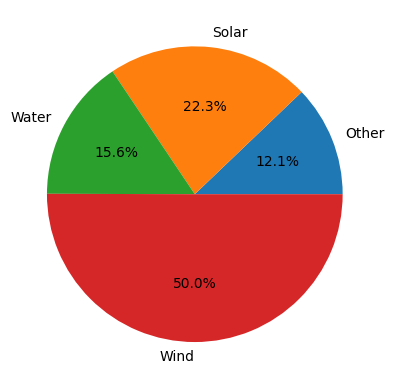

In [14]:
import matplotlib.pyplot as plt

labels = df_gen_2022_eu_gen_types["GenType"]
sizes = df_gen_2022_eu_gen_types["normalized_quantity"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In the pie chart which is visualized in above, the "Wind" is the main source of green energy generation in Europe. 50% of total green energy is come from different type of "Wind" sources. The second main source of European green energy is the "Solar". The 22.3% of the total green energy is come from "Solar" power generation.

In [15]:
df_gen_2022_country = df_gen_2022_country_gen_types.groupby(by=["Country"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_country

,quantity,normalized_quantity
Country,,
DE,977694257,2.430616
DK,25188499,0.062620
HU,20168463,0.050140
IT,82850580,0.205972
NL,61624129,0.153202
PO,32487589,0.080766
SE,103251674,0.256691
SP,327557834,0.814332
UK,2522821,0.006272


In [16]:
df_gen_2022_country = df_gen_2022_country.reset_index()
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,977694257,2.430616
1,DK,25188499,0.062620
2,HU,20168463,0.050140
3,IT,82850580,0.205972
4,NL,61624129,0.153202
5,PO,32487589,0.080766
6,SE,103251674,0.256691
7,SP,327557834,0.814332
8,UK,2522821,0.006272


In [17]:
df_gen_2022_country = df_gen_2022_country.sort_values("quantity", ascending=False)
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,977694257,2.430616
7,SP,327557834,0.814332
6,SE,103251674,0.256691
3,IT,82850580,0.205972
4,NL,61624129,0.153202
5,PO,32487589,0.080766
1,DK,25188499,0.062620
2,HU,20168463,0.050140
8,UK,2522821,0.006272


In the following bar plot, I ranked the European countries in green energy generation in year 2022 from the quantity variable. I use the normalized quantity to draw the bars and also use the orginal quantity to label each bar at top.

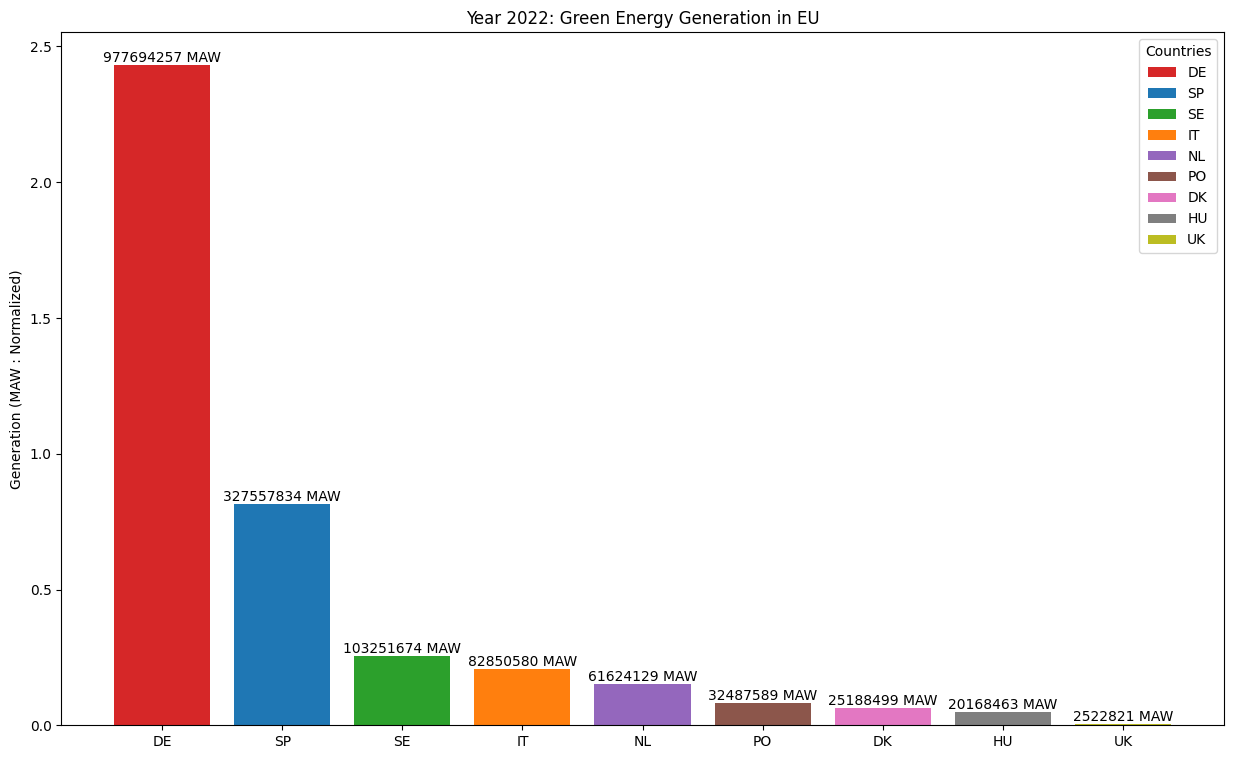

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))

countries = df_gen_2022_country["Country"]
ener_gen = df_gen_2022_country["normalized_quantity"]
bar_labels = countries
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

bar_container = ax.bar(countries, ener_gen, label=bar_labels, color=bar_colors)

ax.set_ylabel('Generation (MAW : Normalized)')
ax.set_title('Year 2022: Green Energy Generation in EU')
ax.legend(title='Countries')
ax.bar_label(bar_container, labels=[f"{q} MAW" for q in df_gen_2022_country["quantity"]])

plt.show()

The bar plot shows that the Germany is ranked 1 country in green energy generation in Europe in year 2022. Germany produced total 977694257 MAW green energy from different sources including Wind, Water and Solar etc. The second largest country who generated green energy in year 2022 is Spain. Spain generated total 327557834 MAW green energy from different sources. 